<a href="https://colab.research.google.com/github/oceam/agri-image/blob/main/codes/YOLOv5withGlovalWheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detecte wheat head use YOLOv5  
Masanori Ishii & Wei Guo  
2022.08.26->2023.09.01  
**Note:** dataset used here is [Global Wheat HEAd deTection (Global WHEAT) Dataset](http://www.global-wheat.com/)

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/).
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

In [1]:
# モジュールを最新にする
! pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [2]:
# !git clone https://github.com/NikaMasa51/yolov5  # clone repo
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


# Download data

Download datasets

In [3]:
!pwd

/content/yolov5


In [16]:
import gdown
# GWHD small dataset 3G
url = "https://drive.google.com/file/d/1-bzA9btP9KVENbnrES-yovylgSCJ8zIc/view?usp=sharing"
output1 = "datasets100.zip"
gdown.download(url, output1, quiet=False, fuzzy=True)
!unzip datasets100.zip -d ../
print("unzip datasets100")

Downloading...
From (uriginal): https://drive.google.com/uc?id=1-bzA9btP9KVENbnrES-yovylgSCJ8zIc
From (redirected): https://drive.google.com/uc?id=1-bzA9btP9KVENbnrES-yovylgSCJ8zIc&confirm=t&uuid=2e4f5680-813b-4d28-9df7-2f2ad9d01bd3
To: /content/yolov5/datasets100.zip
100%|██████████| 3.09G/3.09G [00:15<00:00, 194MB/s]


Streaming output truncated to the last 5000 lines.
  inflating: ../datasets/GlobalWheat2020/images/arvalis_3/4e20b48d-669b-4cee-8ca0-7553c48de4cb.png  
  inflating: ../datasets/GlobalWheat2020/images/arvalis_3/0ebeb719-0ff2-4c12-bec0-5319aa219665.png  
  inflating: ../datasets/GlobalWheat2020/images/arvalis_3/4da058e2-bc1d-410e-bab0-aa439b2e31c3.png  
  inflating: ../datasets/GlobalWheat2020/images/arvalis_3/6b3e7603-7709-48d4-b4cd-ccc3dc356a4d.png  
  inflating: ../datasets/GlobalWheat2020/images/arvalis_3/6b45406f-911d-4427-84fd-3def8850dffc.png  
  inflating: ../datasets/GlobalWheat2020/images/arvalis_3/6b536c4a-f115-451d-9254-3012bbbdee63.png  
  inflating: ../datasets/GlobalWheat2020/images/arvalis_3/3ca1841d-ee91-4b0b-b67b-3bb825c45f24.png  
  inflating: ../datasets/GlobalWheat2020/images/arvalis_3/2fc82701-d996-42cd-8b02-6713739c1a90.png  
  inflating: ../datasets/GlobalWheat2020/images/arvalis_3/4f1fd454-b309-4d5a-95c9-28b66f3642c3.png  
  inflating: ../datasets/GlobalWheat2020

Download yaml file

In [17]:
import gdown
# a file
url = "https://drive.google.com/file/d/1-ILg4BW5U2slRvEa2hPXXN7_KhqMMgm2/view?usp=sharing"
output1 = "./data/GlobalWheat2020_coco.yaml"
gdown.download(url, output1, quiet=False, fuzzy=True)
print("Download GlobalWheat2020_coco.yaml")

Downloading...
From: https://drive.google.com/uc?id=1-ILg4BW5U2slRvEa2hPXXN7_KhqMMgm2
To: /content/yolov5/data/GlobalWheat2020_coco.yaml
100%|██████████| 1.96k/1.96k [00:00<00:00, 1.75MB/s]

Download GlobalWheat2020_coco.yaml


Download runs(予め学習済みのweightを取得)

In [19]:
import gdown

# a file
url = "https://drive.google.com/file/d/1LIiuEaWoAW5-fJRlQMG7lDUip15z7UWC/view?usp=sharing"
output1 = "runs.zip"
gdown.download(url, output1, quiet=False, fuzzy=True)
!unzip runs.zip
print("unzip runs")

Downloading...
From (uriginal): https://drive.google.com/uc?id=1LIiuEaWoAW5-fJRlQMG7lDUip15z7UWC
From (redirected): https://drive.google.com/uc?id=1LIiuEaWoAW5-fJRlQMG7lDUip15z7UWC&confirm=t&uuid=af68b177-be2d-490e-90dc-52d439a445fe
To: /content/yolov5/runs.zip
100%|██████████| 366M/366M [00:08<00:00, 40.9MB/s]


Archive:  runs.zip
   creating: runs/
   creating: runs/train/
   creating: runs/train/GlobalWheat/
   creating: runs/train/GlobalWheat/demo/
  inflating: runs/train/GlobalWheat/demo/opt.yaml  
   creating: runs/train/GlobalWheat/demo/weights/
  inflating: runs/train/GlobalWheat/demo/weights/last.pt  
  inflating: runs/train/GlobalWheat/demo/weights/best.pt  
  inflating: runs/train/GlobalWheat/demo/results.csv  
  inflating: runs/train/GlobalWheat/demo/val_batch0_pred.jpg  
  inflating: runs/train/GlobalWheat/demo/val_batch0_labels.jpg  
  inflating: runs/train/GlobalWheat/demo/labels.jpg  
  inflating: runs/train/GlobalWheat/demo/train_batch0.jpg  
  inflating: runs/train/GlobalWheat/demo/events.out.tfevents.1657773498.526c6b5b7d05.670.0  
  inflating: runs/train/GlobalWheat/demo/val_batch2_pred.jpg  
  inflating: runs/train/GlobalWheat/demo/confusion_matrix.png  
  inflating: runs/train/GlobalWheat/demo/val_batch2_labels.jpg  
  inflating: runs/train/GlobalWheat/demo/labels_correlog

・Dataset images

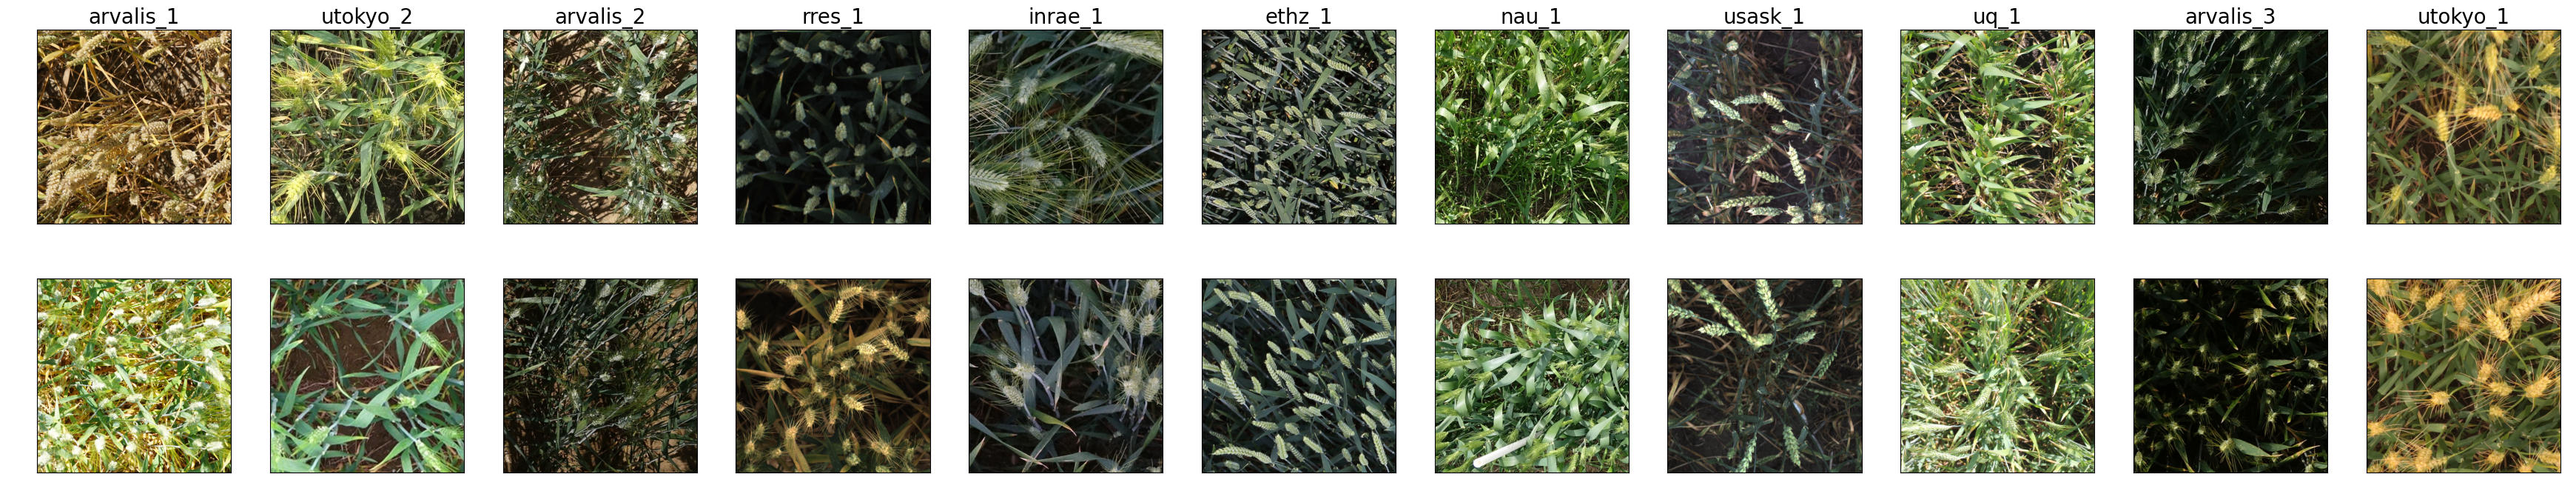

In [21]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

def show_img():
  #　リストに定義
  wheat_names = ['arvalis_1', 'arvalis_2', 'arvalis_3', 'ethz_1', 'rres_1', 'inrae_1', 'usask_1', \
        'utokyo_1', 'utokyo_2', 'nau_1', 'uq_1']

  dir_path = '/content/datasets/GlobalWheat2020/images'
  dir_list = os.listdir(dir_path)

  #　リストの長さを足して表示枚数を確認
  hs = len(wheat_names)*2

  #　表示設定
  col=len(wheat_names)
  row=int(hs/col)
  cols=col*4
  rows=row*4
  dpis = 100

  #　イメージの表示サイズ、解像度
  fig = plt.figure(figsize=(cols,rows),dpi=dpis)

  #　＊＊番目に指定
  pi=1

  #　イメージ表示
  for input_dir in dir_list:
    if input_dir=='.DS_Store':
      continue
    #　1段目
    img_path = os.path.join(dir_path, input_dir)
    img_list = os.listdir(img_path)
    plot_num = pi
    ax=fig.add_subplot(row, col, plot_num)
    ax.set_title(input_dir, fontsize=20)
    # if plot_num == 1:
    #   plt.ylabel(f'wheat{i}', fontsize=20) # y軸ラベル
    img = Image.open(os.path.join(img_path, img_list[1])) # indexを変更して別の画像を表示！！
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.imshow(img, cmap='gray')
    #　2段目
    img_path = os.path.join(dir_path, input_dir)
    img_list = os.listdir(img_path)
    plot_num2 = pi+11
    bx=fig.add_subplot(row, col, plot_num2)
    # bx.set_title(input_dir, fontsize=20, pad=0)
    # if plot_num2 == 11:
    #   plt.ylabel(weed_type[1], fontsize=20) # y軸ラベル
    img2 = Image.open(os.path.join(img_path, img_list[2]))
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.imshow(img2, cmap='gray')
    pi = pi+1
  fig.align_labels()

show_img()

# Train Object Detection


In [ ]:
!python train.py --batch 8 --weights yolov5x.pt --data GlobalWheat2020_coco.yaml --epochs 10 --cache --img 640 --project runs/train/GlobalWheat --name demo640_data100

Large model(おまけ)

In [ ]:
# !python train.py --batch 8 --weights yolov5n6.pt --data GlobalWheat2020_coco.yaml --epochs 10 --cache --img 1280 --project runs/train/GlobalWheat --name demo

mAP @ [.5：.95]（mAP @ [.5,.95]と表示する人もいる）は、0.5から0.95までのさまざまなIoUしきい値での平均mAPを示す（0.05ごとに0.5、0.55、0.6、0.65、0.7、0.75、 0.8、0.85、0.9、0.95）。

# 1. Inference

In [ ]:
# !python detect.py --weights runs/train/GlobalWheat/demo/weights/best.pt --img 1280 --source ../datasets/GlobalWheat2020/images/usask_1 --project runs/detect/GlobalWheat --name demo

In [ ]:
!python val.py --iou-thres 0.999 --weights runs/train/GlobalWheat/demo640_data100/weights/best.pt --data GlobalWheat2020_coco.yaml --task test --project runs/val/GlobalWheat --name demo640_data100

# Perform inferencing

In [ ]:
from typing import List, Tuple

import matplotlib.patches as patches
import numpy as np
from PIL import Image

# boxをimageに表示
def add_bboxes_to_image(ax, image: np.ndarray,
                        bboxes: List[Tuple[int, int, int, int]],
                        labels: List[str] = None,
                        label_size: int = 10,
                        line_width: int = 2,
                        border_color=(0, 1, 0, 1),
                        height=640,
                        width=640) -> None:
    """
    Add bbox to ax

    :param image: dtype=np.uint8
    :param bbox: [(left, top, right, bottom)]
    :param label: List[str] or None
    :return: ax
    """
    # Display the image
    ax.imshow(image)

    if labels is None:
        labels = [None] * len(bboxes)

    for bbox, label in zip(bboxes, labels):
        # Add bounding box
        left, top, width_, height_ = bbox
        rect = patches.Rectangle((left, top), width_, height_,
                                 linewidth=line_width,
                                 edgecolor=border_color,
                                 facecolor='none')
        ax.add_patch(rect)

        # label
        if label:
            bbox_props = dict(boxstyle="square,pad=0",
                              linewidth=line_width, facecolor=border_color,
                              edgecolor=border_color)
            ax.text(left, top, label,
                    ha="left", va="bottom", rotation=0,
                    size=label_size, bbox=bbox_props)
    return ax

In [ ]:
import json

json_file = './runs/val/GlobalWheat/demo640_data100/best_predictions.json'

# read labelbox JSON output
with open(json_file, 'r', encoding='utf-8') as f:
    # lines = f.readlines()
    pred_data = json.load(f)

predicted_boxes_ = []
# print('uid', datarow.uid)
for row in pred_data:
    if row['image_id']=='00175657-c80c-4ce1-a2d7-7d89592ee892':
        predicted_boxes_.append(row['bbox'])


In [ ]:
from PIL import Image
from matplotlib import pyplot as plt

image = np.array(Image.open('/content/datasets/GlobalWheat2020/images/utokyo_1/00175657-c80c-4ce1-a2d7-7d89592ee892.png'))
print(image.shape)
height, width = image.shape[:2]

bboxes = predicted_boxes_ # [left, top, w, h]

print(bboxes)
fig, ax = plt.subplots()
add_bboxes_to_image(ax, np.uint8(image), bboxes, height=height, width=width)
# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

# Evolustion(おまけ)

In [ ]:
# !python train.py --batch 8 --weights yolov5n6.pt --data GlobalWheat2020_coco.yaml --epochs 10 --cache  --evolve --img 1280 --project runs/evolve/GlobalWheat2020 --name demo